Importing libraries and modules.

In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import seaborn as sns
from xgboost import XGBClassifier

Creating pipelines and evaluating the functions

In [ ]:
def create_and_train_pipeline(classifier, X_train, y_train):
    pipe = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', classifier()),
    ])

    pipe.fit(X_train, y_train)
    return pipe


def evaluate_clf(clf, X_test, y_test, labels, full=False):
    predicted = clf.predict(X_test)
    if full:
        return classification_report(y_test, predicted, target_names=labels)
    else:
        return np.mean(y_test == predicted)

Importing the data set and basic formatting. Then splitting the data into a training and testing set.

In [200]:
url = "https://raw.githubusercontent.com/Makxxx/data_dmmlProject/main/training_data.csv"
data = pd.read_csv(url, index_col=0, dtype=str)
data.sentence = data.sentence.apply(lambda s: s.replace("'", ' ')) # Removing apostrophes
labels = data.difficulty.unique() # Adding the difficulty labels in an np.array
num_labels = len(labels)
data.difficulty = LabelEncoder().fit_transform(data.difficulty)
#-------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.sentence, data.difficulty, random_state=0,test_size=0.2)

In [201]:
type(labels)

numpy.ndarray

## 1. Train your models
Set your X and y variables.
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.


### 1.2 Baseline
What is the baseline for this classification problem ?

In [203]:
base_rate = y_train.value_counts(normalize=True)
base_rate

#### 1.3 Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [204]:
lr_clf = create_and_train_pipeline(LogisticRegression, X_train, y_train)

Calculate accuracy, precision, recall and F1 score on the test set.

In [205]:
print("logistic", evaluate_clf(lr_clf, X_test, y_test, labels, full=True))

logistic               precision    recall  f1-score   support

          C1       0.53      0.58      0.55       161
          A1       0.41      0.37      0.39       164
          B1       0.43      0.40      0.42       160
          A2       0.43      0.46      0.44       144
          B2       0.51      0.42      0.46       173
          C2       0.48      0.58      0.53       158

    accuracy                           0.47       960
   macro avg       0.46      0.47      0.46       960
weighted avg       0.47      0.47      0.46       960



In [206]:
Xtestpred_lr = lr_clf.predict(X_test)

# Accuracy of test set
accuracy_test_lr = accuracy_score(y_test, Xtestpred_lr)
print("Accuracy Score : ", accuracy_test_lr)

# Precision of test set
precision_test_lr = precision_score(y_test, Xtestpred_lr, average='macro')
print("Precision Score : ", precision_test_lr)

# Recall of test set
recall_lr = recall_score(y_test, Xtestpred_lr, average='macro')
print("Recall Score : ", recall_lr)

# f1 Score of test set
f1score_lr = f1_score(y_test, Xtestpred_lr, average='macro')
print("f1 Score : ", f1score_lr)

Accuracy Score :  0.4666666666666667
Precision Score :  0.46449602390336936
Recall Score :  0.46767842372574114
f1 Score :  0.4640138012889838


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

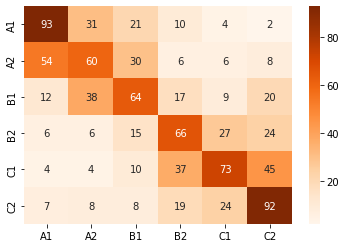

In [207]:
ID_TO_LABEL = dict(zip(range(6), ('A1', 'A2', 'B1', 'B2', 'C1', 'C2',)))
label_names = list(ID_TO_LABEL.values())

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, Xtestpred_lr), label_names, label_names), annot=True, cmap='Oranges', fmt='.5g');


In [208]:
# What sentences are missclassified ? 
test_sent = np.array(X_test)
test_array = np.array(y_test)
pred_array = np.array(Xtestpred_lr)
wrong_predictions = list()
for i in range(0, 50):
  if pred_array[i] != test_array[i]:
     wrong_predictions.append([test_sent[i], test_array[i], pred_array[i]])
wrong_predictions[:5]

[['C est en décembre 1967, après bien des invectives au Parlement, que sa loi relative à la régulation des naissances, dite loi Neuwirth est votée : elle autorise la vente exclusive des contraceptifs en pharmacie sur ordonnance médicale, avec autorisation parentale pour les mineures',
  4,
  5],
 ['Giscard va pourtant réussir à transformer ce revers en tremplin', 4, 3],
 ['Un choix difficile mais important : le public français écoute souvent les professionnels de Cannes pour choisir le film qu il va aller voir au cinéma.',
  1,
  2],
 ['Le débat porte plutôt sur l utilité d une telle mesure.', 2, 4],
 ['Il faut du temps et du courage pour soigner toute cette ménagerie En plus des animaux, il faut aussi s occuper du potager de mon papy',
  1,
  2]]

#### 1.4 KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [209]:
knn_clf = create_and_train_pipeline(KNeighborsClassifier, X_train, y_train)

In [210]:
print("knn", evaluate_clf(knn_clf, X_test, y_test, labels, full=True))

knn               precision    recall  f1-score   support

          C1       0.28      0.75      0.41       161
          A1       0.24      0.31      0.27       164
          B1       0.28      0.21      0.24       160
          A2       0.40      0.20      0.27       144
          B2       0.66      0.17      0.27       173
          C2       0.54      0.27      0.36       158

    accuracy                           0.32       960
   macro avg       0.40      0.32      0.30       960
weighted avg       0.40      0.32      0.30       960



In [211]:
Xtestpred_knn = knn_clf.predict(X_test)

# Accuracy of test set
accuracy_test_knn = accuracy_score(y_test, Xtestpred_knn)
print("Accuracy Score : ", accuracy_test_knn)

# Precision of test set
precision_test_knn = precision_score(y_test, Xtestpred_knn, average='macro')
print("Precision Score : ", precision_test_knn)

# Recall of test set
recall_knn = recall_score(y_test, Xtestpred_knn, average='macro')
print("Recall Score : ", recall_knn)

# f1 Score of test set
f1score_knn = f1_score(y_test, Xtestpred_knn, average='macro')
print("f1 Score : ", f1score_knn)

Accuracy Score :  0.31875
Precision Score :  0.4006786607204127
Recall Score :  0.31832487503561463
f1 Score :  0.3022264355028889


#### 1.5 Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [212]:
dt_clf = create_and_train_pipeline(DecisionTreeClassifier, X_train, y_train)

In [213]:
print("dt", evaluate_clf(dt_clf, X_test, y_test, labels, full=True))

dt               precision    recall  f1-score   support

          C1       0.44      0.51      0.47       161
          A1       0.29      0.32      0.31       164
          B1       0.21      0.23      0.22       160
          A2       0.25      0.28      0.26       144
          B2       0.36      0.27      0.31       173
          C2       0.33      0.26      0.29       158

    accuracy                           0.31       960
   macro avg       0.31      0.31      0.31       960
weighted avg       0.31      0.31      0.31       960



In [214]:
Xtestpred_dt = dt_clf.predict(X_test)

# Accuracy of test set
accuracy_test_dt = accuracy_score(y_test, Xtestpred_dt)
print("Accuracy Score : ", accuracy_test_dt)

# Precision of test set
precision_test_dt = precision_score(y_test, Xtestpred_dt, average='macro')
print("Precision Score : ", precision_test_dt)

# Recall of test set
recall_dt = recall_score(y_test, Xtestpred_dt, average='macro')
print("Recall Score : ", recall_dt)

# f1 Score of test set
f1score_dt = f1_score(y_test, Xtestpred_dt, average='macro')
print("f1 Score : ", f1score_dt)

Accuracy Score :  0.31145833333333334
Precision Score :  0.31237121966329484
Recall Score :  0.3111508173857886
f1 Score :  0.3091165406270082


#### 1.6 Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [215]:
rf_clf = create_and_train_pipeline(RandomForestClassifier, X_train, y_train)

In [216]:
print("rf", evaluate_clf(rf_clf, X_test, y_test, labels, full=True))

rf               precision    recall  f1-score   support

          C1       0.42      0.75      0.53       161
          A1       0.36      0.32      0.34       164
          B1       0.41      0.33      0.36       160
          A2       0.34      0.49      0.41       144
          B2       0.46      0.23      0.31       173
          C2       0.54      0.37      0.44       158

    accuracy                           0.41       960
   macro avg       0.42      0.41      0.40       960
weighted avg       0.42      0.41      0.40       960



In [217]:
Xtestpred_rf = rf_clf.predict(X_test)

# Accuracy of test set
accuracy_test_rf = accuracy_score(y_test, Xtestpred_rf)
print("Accuracy Score : ", accuracy_test_rf)

# Precision of test set
precision_test_rf = precision_score(y_test, Xtestpred_rf, average='macro')
print("Precision Score : ", precision_test_rf)

# Recall of test set
recall_rf = recall_score(y_test, Xtestpred_rf, average='macro')
print("Recall Score : ", recall_rf)

# f1 Score of test set
f1score_rf = f1_score(y_test, Xtestpred_rf, average='macro')
print("f1 Score : ", f1score_rf)

Accuracy Score :  0.409375
Precision Score :  0.42144899047162315
Recall Score :  0.41312880360356696
f1 Score :  0.3973416087901851


#### 1.7 Any other technique : XGB Classifier

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [218]:
xgb_clf = create_and_train_pipeline(XGBClassifier, X_train, y_train)

In [219]:
print("xgb", evaluate_clf(xgb_clf, X_test, y_test, labels, full=True))

xgb               precision    recall  f1-score   support

          C1       0.40      0.71      0.52       161
          A1       0.31      0.29      0.30       164
          B1       0.37      0.34      0.36       160
          A2       0.36      0.44      0.40       144
          B2       0.40      0.21      0.27       173
          C2       0.49      0.34      0.40       158

    accuracy                           0.39       960
   macro avg       0.39      0.39      0.38       960
weighted avg       0.39      0.39      0.37       960



In [220]:
Xtestpred_xgb = xgb_clf.predict(X_test)

# Accuracy of test set
accuracy_test_xgb = accuracy_score(y_test, Xtestpred_xgb)
print("Accuracy Score : ", accuracy_test_xgb)

# Precision of test set
precision_test_xgb = precision_score(y_test, Xtestpred_xgb, average='macro')
print("Precision Score : ", precision_test_xgb)

# Recall of test set
recall_xgb = recall_score(y_test, Xtestpred_xgb, average='macro')
print("Recall Score : ", recall_xgb)

# f1 Score of test set
f1score_xgb = f1_score(y_test, Xtestpred_xgb, average='macro')
print("f1 Score : ", f1score_xgb)

Accuracy Score :  0.3875
Precision Score :  0.39123699327835576
Recall Score :  0.390837953834549
f1 Score :  0.37571589789692017


#### 1.8 Show a summary of your results

In [221]:
summary_testset = {'Accuracy' : [accuracy_test_lr, accuracy_test_knn, accuracy_test_dt, accuracy_test_rf, accuracy_test_xgb], 
           'Precision' : [precision_test_lr, precision_test_knn, precision_test_dt, precision_test_rf, precision_test_xgb], 
           'Recall' : [recall_lr, recall_knn, recall_dt, recall_rf, recall_xgb],
           'f1_Score' :[f1score_lr, f1score_knn, f1score_dt, f1score_rf, f1score_xgb]}

table = pd.DataFrame(summary_testset, index = ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree classifier', 'Random Forest Classifier', 'XGB Classifier'])

table


,Accuracy,Precision,Recall,f1_Score
Logistic Regression,0.466667,0.464496,0.467678,0.464014
K-Nearest Neighbour,0.318750,0.400679,0.318325,0.302226
Decision Tree classifier,0.311458,0.312371,0.311151,0.309117
Random Forest Classifier,0.409375,0.421449,0.413129,0.397342
XGB Classifier,0.387500,0.391237,0.390838,0.375716
